<a href="https://colab.research.google.com/github/vkjadon/ros2/blob/master/ds_robot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Basic Robot Movement

In [2]:
class Robot:
    def __init__(self, start_position):
        self.position = start_position

    def move(self, command):
        if command == "Move Forward":
            self.position = (self.position[0] + 1, self.position[1])
        elif command == "Move Backward":
            self.position = (self.position[0] - 1, self.position[1])
        elif command == "Turn Left":
            self.position = (self.position[0], self.position[1] - 1)
        elif command == "Turn Right":
            self.position = (self.position[0], self.position[1] + 1)

    def get_position(self):
        return self.position


# Example usage
robot = Robot(start_position=(0, 0))
print("Initial Position:", robot.get_position())

robot.move("Move Forward")
print("Current Position:", robot.get_position())

Initial Position: (0, 0)
Current Position: (1, 0)


Queue for Managing Movement Commands

In [5]:
from collections import deque

class RobotWithQueue:
    def __init__(self, start_position):
        self.position = start_position
        self.command_queue = deque()  # Queue to store commands

    def add_command(self, command):
        self.command_queue.append(command)

    def execute_commands(self):
        while self.command_queue:
            command = self.command_queue.popleft()
            self.move(command)

    def move(self, command):
        if command == "Move Forward":
            self.position = (self.position[0] + 1, self.position[1])
        elif command == "Move Backward":
            self.position = (self.position[0] - 1, self.position[1])
        elif command == "Turn Left":
            self.position = (self.position[0], self.position[1] - 1)
        elif command == "Turn Right":
            self.position = (self.position[0], self.position[1] + 1)

    def get_position(self):
        return self.position


# Example usage
robot = RobotWithQueue(start_position=(0, 0))
robot.add_command("Move Forward")
robot.execute_commands()
print("Current Position:", robot.get_position())

robot.add_command("Turn Right")
robot.execute_commands()
print("Current Position:", robot.get_position())

robot.add_command("Move Forward")
robot.execute_commands()
print("Current Position:", robot.get_position())


Current Position: (1, 0)
Current Position: (1, 1)
Current Position: (2, 1)


Stack for Undoing Last Command

In [6]:
from collections import deque

class RobotWithUndo:
    def __init__(self, start_position):
        self.position = start_position
        self.command_queue = deque()
        self.command_stack = []  # Stack to store executed commands

    def add_command(self, command):
        self.command_queue.append(command)

    def execute_commands(self):
        while self.command_queue:
            command = self.command_queue.popleft()
            self.move(command)
            self.command_stack.append(command)  # Store command in stack for undo

    def move(self, command):
        if command == "Move Forward":
            self.position = (self.position[0] + 1, self.position[1])
        elif command == "Move Backward":
            self.position = (self.position[0] - 1, self.position[1])
        elif command == "Turn Left":
            self.position = (self.position[0], self.position[1] - 1)
        elif command == "Turn Right":
            self.position = (self.position[0], self.position[1] + 1)

    def undo_last_command(self):
        if not self.command_stack:
            print("No commands to undo!")
            return
        last_command = self.command_stack.pop()
        self.reverse_move(last_command)

    def reverse_move(self, command):
        if command == "Move Forward":
            self.position = (self.position[0] - 1, self.position[1])
        elif command == "Move Backward":
            self.position = (self.position[0] + 1, self.position[1])
        elif command == "Turn Left":
            self.position = (self.position[0], self.position[1] + 1)
        elif command == "Turn Right":
            self.position = (self.position[0], self.position[1] - 1)

    def get_position(self):
        return self.position


# Example usage
robot = RobotWithUndo(start_position=(0, 0))
robot.add_command("Move Forward")
robot.add_command("Turn Right")
robot.execute_commands()
print("Current Position:", robot.get_position())

# Undo the last command
robot.undo_last_command()
print("Position after undo:", robot.get_position())


Current Position: (1, 1)
Position after undo: (1, 0)


Linked List for Tracking Robot Path

In [7]:
class Node:
    def __init__(self, position):
        self.position = position
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, position):
        new_node = Node(position)
        if not self.head:
            self.head = new_node
            return
        last = self.head
        while last.next:
            last = last.next
        last.next = new_node

    def get_path(self):
        path = []
        current = self.head
        while current:
            path.append(current.position)
            current = current.next
        return path

# Basic usage of LinkedList
path = LinkedList()
path.append((0, 0))
path.append((1, 0))
path.append((1, 1))
print("Path:", path.get_path())


Path: [(0, 0), (1, 0), (1, 1)]


Complete System: Combining Everything

In [8]:
from collections import deque

class Node:
    def __init__(self, position):
        self.position = position
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, position):
        new_node = Node(position)
        if not self.head:
            self.head = new_node
            return
        last = self.head
        while last.next:
            last = last.next
        last.next = new_node

    def delete_last(self):
        if not self.head:
            return None
        if not self.head.next:
            self.head = None
            return
        second_last = self.head
        while second_last.next.next:
            second_last = second_last.next
        second_last.next = None

    def get_path(self):
        path = []
        current = self.head
        while current:
            path.append(current.position)
            current = current.next
        return path

class RobotComplete:
    def __init__(self, start_position):
        self.position = start_position
        self.command_queue = deque()
        self.command_stack = []
        self.path = LinkedList()
        self.path.append(start_position)

    def add_command(self, command):
        self.command_queue.append(command)

    def execute_commands(self):
        while self.command_queue:
            command = self.command_queue.popleft()
            self.move(command)
            self.command_stack.append(command)
            self.path.append(self.position)

    def move(self, command):
        if command == "Move Forward":
            self.position = (self.position[0] + 1, self.position[1])
        elif command == "Move Backward":
            self.position = (self.position[0] - 1, self.position[1])
        elif command == "Turn Left":
            self.position = (self.position[0], self.position[1] - 1)
        elif command == "Turn Right":
            self.position = (self.position[0], self.position[1] + 1)

    def undo_last_command(self):
        if not self.command_stack:
            print("No commands to undo!")
            return
        last_command = self.command_stack.pop()
        self.reverse_move(last_command)
        self.path.delete_last()

    def reverse_move(self, command):
        if command == "Move Forward":
            self.position = (self.position[0] - 1, self.position[1])
        elif command == "Move Backward":
            self.position = (self.position[0] + 1, self.position[1])
        elif command == "Turn Left":
            self.position = (self.position[0], self.position[1] + 1)
        elif command == "Turn Right":
            self.position = (self.position[0], self.position[1] - 1)

    def get_position(self):
        return self.position

    def get_path(self):
        return self.path.get_path()


# Example usage
robot = RobotComplete(start_position=(0, 0))
robot.add_command("Move Forward")
robot.add_command("Turn Right")
robot.execute_commands()
print("Current Position:", robot.get_position())
print("Path:", robot.get_path())

robot.undo_last_command()
print("Position after undo:", robot.get_position())
print("Path after undo:", robot.get_path())


Current Position: (1, 1)
Path: [(0, 0), (1, 0), (1, 1)]
Position after undo: (1, 0)
Path after undo: [(0, 0), (1, 0)]


In [9]:
class TreeNode:
    def __init__(self, position):
        self.position = position
        self.children = []  # Branches to possible next moves

    def add_child(self, child_node):
        self.children.append(child_node)

# Example of constructing a simple decision tree for robot moves
root = TreeNode((0, 0))  # Starting position

# Level 1 decisions (possible moves from the start)
move_forward = TreeNode((1, 0))
turn_right = TreeNode((0, 1))
root.add_child(move_forward)
root.add_child(turn_right)

# Level 2 decisions (possible moves from previous positions)
move_forward.add_child(TreeNode((2, 0)))
turn_right.add_child(TreeNode((0, 2)))

# Traversing the tree (e.g., depth-first search)
def traverse_tree(node):
    print(f"Visiting position: {node.position}")
    for child in node.children:
        traverse_tree(child)

# Start traversing from the root
traverse_tree(root)


Visiting position: (0, 0)
Visiting position: (1, 0)
Visiting position: (2, 0)
Visiting position: (0, 1)
Visiting position: (0, 2)


In [10]:
from collections import deque

class Graph:
    def __init__(self):
        self.adjacency_list = {}  # Dictionary to store graph

    def add_edge(self, node1, node2):
        if node1 not in self.adjacency_list:
            self.adjacency_list[node1] = []
        if node2 not in self.adjacency_list:
            self.adjacency_list[node2] = []
        self.adjacency_list[node1].append(node2)
        self.adjacency_list[node2].append(node1)  # Assuming an undirected graph

    def bfs(self, start_node):
        visited = set()
        queue = deque([start_node])
        while queue:
            node = queue.popleft()
            if node not in visited:
                print(f"Visiting node: {node}")
                visited.add(node)
                for neighbor in self.adjacency_list[node]:
                    if neighbor not in visited:
                        queue.append(neighbor)

# Example of constructing a graph for robot navigation
graph = Graph()
graph.add_edge((0, 0), (1, 0))  # Edge between two positions
graph.add_edge((1, 0), (1, 1))
graph.add_edge((1, 1), (0, 1))
graph.add_edge((0, 1), (0, 0))

# Perform a breadth-first search (BFS) starting from (0, 0)
graph.bfs((0, 0))


Visiting node: (0, 0)
Visiting node: (1, 0)
Visiting node: (0, 1)
Visiting node: (1, 1)


In [11]:
class TreeNode:
    def __init__(self, position):
        self.position = position
        self.children = []

    def add_child(self, child_node):
        self.children.append(child_node)

# Example: Build a tree representing possible robot moves in a grid
root = TreeNode((0, 0))  # Start at position (0, 0)

# Level 1 (First move decisions)
move_forward = TreeNode((1, 0))
turn_right = TreeNode((0, 1))
turn_left = TreeNode((0, -1))
root.add_child(move_forward)
root.add_child(turn_right)
root.add_child(turn_left)

# Level 2 (Second move decisions)
move_forward.add_child(TreeNode((2, 0)))  # Moving forward again
move_forward.add_child(TreeNode((1, 1)))  # Turning right from (1, 0)
move_forward.add_child(TreeNode((1, -1)))  # Turning left from (1, 0)

turn_right.add_child(TreeNode((0, 2)))  # Moving forward after turning right
turn_right.add_child(TreeNode((1, 1)))  # Moving right and then forward

turn_left.add_child(TreeNode((0, -2)))  # Moving forward after turning left
turn_left.add_child(TreeNode((-1, -1)))  # Turning left again

# Recursive function to traverse and print the tree
def traverse_tree(node, level=0):
    indent = "  " * level
    print(f"{indent}Position: {node.position}")
    for child in node.children:
        traverse_tree(child, level + 1)

# Start traversing from the root node
traverse_tree(root)


Position: (0, 0)
  Position: (1, 0)
    Position: (2, 0)
    Position: (1, 1)
    Position: (1, -1)
  Position: (0, 1)
    Position: (0, 2)
    Position: (1, 1)
  Position: (0, -1)
    Position: (0, -2)
    Position: (-1, -1)


In [12]:
from collections import deque

class Graph:
    def __init__(self):
        self.adjacency_list = {}

    def add_edge(self, node1, node2):
        if node1 not in self.adjacency_list:
            self.adjacency_list[node1] = []
        if node2 not in self.adjacency_list:
            self.adjacency_list[node2] = []
        self.adjacency_list[node1].append(node2)
        self.adjacency_list[node2].append(node1)  # Assuming undirected graph

    def bfs(self, start_node):
        visited = set()
        queue = deque([start_node])
        while queue:
            node = queue.popleft()
            if node not in visited:
                print(f"Visiting node: {node}")
                visited.add(node)
                for neighbor in self.adjacency_list[node]:
                    if neighbor not in visited:
                        queue.append(neighbor)

    def dfs(self, start_node, visited=None):
        if visited is None:
            visited = set()
        visited.add(start_node)
        print(f"Visiting node: {start_node}")
        for neighbor in self.adjacency_list[start_node]:
            if neighbor not in visited:
                self.dfs(neighbor, visited)

# Example: Build a graph representing rooms and corridors
graph = Graph()
graph.add_edge("Room 1", "Room 2")
graph.add_edge("Room 1", "Room 3")
graph.add_edge("Room 2", "Room 4")
graph.add_edge("Room 2", "Room 5")
graph.add_edge("Room 3", "Room 6")
graph.add_edge("Room 4", "Room 7")
graph.add_edge("Room 5", "Room 8")
graph.add_edge("Room 6", "Room 9")

# Perform a breadth-first search (BFS) starting from "Room 1"
print("Breadth-First Search:")
graph.bfs("Room 1")

# Perform a depth-first search (DFS) starting from "Room 1"
print("\nDepth-First Search:")
graph.dfs("Room 1")


Breadth-First Search:
Visiting node: Room 1
Visiting node: Room 2
Visiting node: Room 3
Visiting node: Room 4
Visiting node: Room 5
Visiting node: Room 6
Visiting node: Room 7
Visiting node: Room 8
Visiting node: Room 9

Depth-First Search:
Visiting node: Room 1
Visiting node: Room 2
Visiting node: Room 4
Visiting node: Room 7
Visiting node: Room 5
Visiting node: Room 8
Visiting node: Room 3
Visiting node: Room 6
Visiting node: Room 9


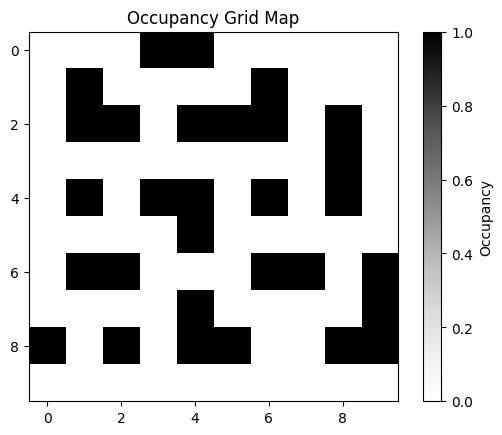

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 10x10 grid map (0 = free space, 1 = obstacle)
occupancy_grid_map = np.array([
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])

# Function to display the grid map
def display_grid_map(grid_map):
    plt.imshow(grid_map, cmap='Greys', origin='upper')
    plt.colorbar(label="Occupancy")
    plt.title("Occupancy Grid Map")
    plt.show()

# Display the grid map
display_grid_map(occupancy_grid_map)


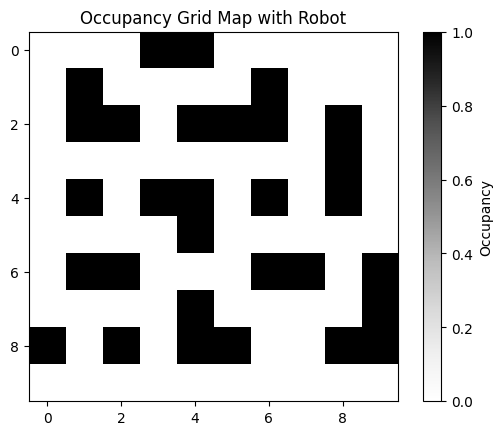

In [30]:
# Define the robot's starting position
robot_position = [0, 0]  # Top-left corner

def display_grid_with_robot(grid_map, robot_position):
    grid_with_robot = grid_map.copy()
    # grid_with_robot[robot_position[0], robot_position[1]] = 0.5  # Represent robot as 0.5
    plt.imshow(grid_with_robot, cmap='Greys', origin='upper')
    plt.colorbar(label="Occupancy")
    plt.title("Occupancy Grid Map with Robot")
    plt.show()

# Display the grid with the robot
display_grid_with_robot(occupancy_grid_map, robot_position)
